In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm.auto import tqdm as tqdm

In [20]:
def regamma(data, gammaIn, gammaOut):
    data = np.power(data, gammaOut)
    data = np.power(data, 1.0 / gammaIn)
    return data

def gamma(data, gamma):
    data = np.power(data, 1.0 / gamma)
    return data

In [56]:
inPrefix = "D:\\deadlineframes\\sep50\\"
outPrefix = "D:\\deadlineframes\\outsep50\\"

In [28]:
dataTest = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
gamma(dataTest, 2.2)

array([0.35111917, 0.48115651, 0.57853261, 0.65935329, 0.72974005,
       0.79279273, 0.85033493, 0.90354543, 0.95323755, 1.        ])

In [30]:
for idx, name in enumerate(tqdm(glob(inPrefix + "*.raw"))):
    data = np.fromfile(name, dtype='uint8')
    data = np.rot90(data.reshape(400, 240, 4))
    data2 = np.zeros(data.shape, dtype="uint8")
    data2[:, :, 0] = data[:, :, 3] 
    data2[:, :, 1] = data[:, :, 2] 
    data2[:, :, 2] = data[:, :, 1] 
    data2[:, :, 3] = data[:, :, 0]
    data2 = np.repeat(data2, 3, axis=0)
    data2 = np.repeat(data2, 3, axis=1)
    data2 = np.pad(data2, [(0, 0), (40, 40), (0, 0)])
    img = Image.fromarray(data2, mode="RGBA")
    img.save(name.replace(".raw", ".png"))

  0%|          | 0/7820 [00:00<?, ?it/s]

KeyboardInterrupt: 

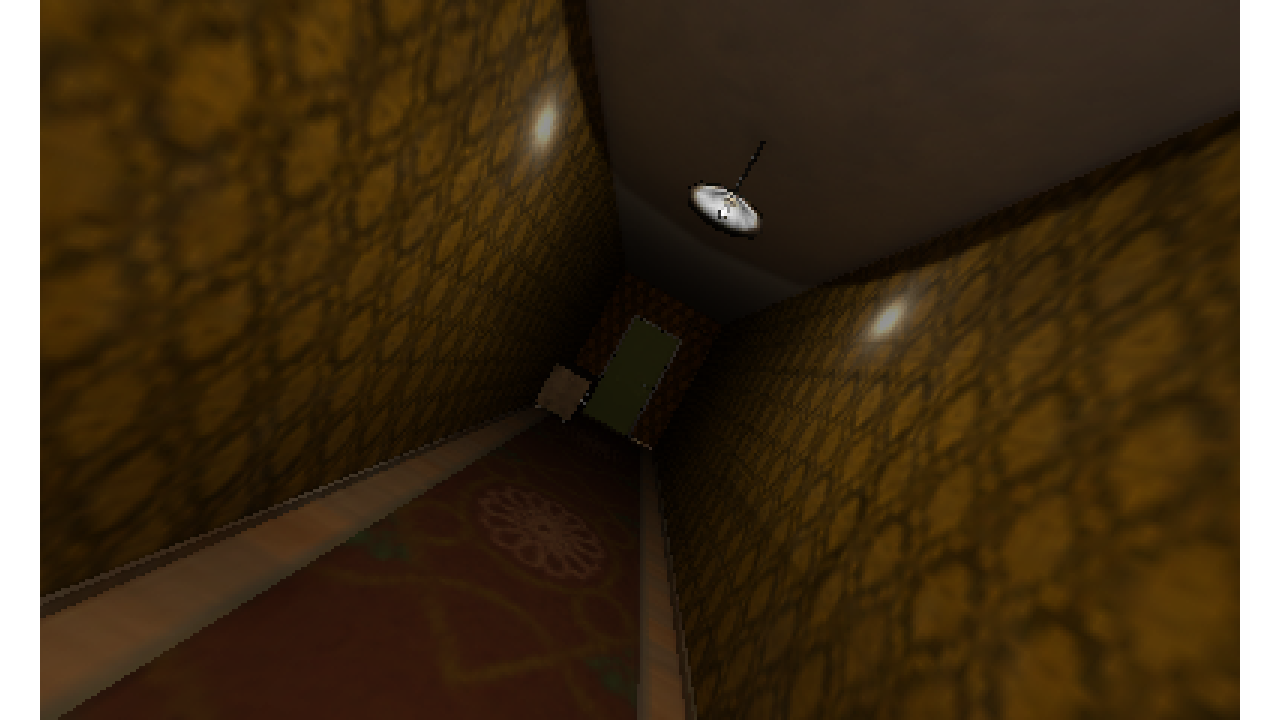

In [108]:
# ffmpeg -framerate 30 -i "fb_left_%08d.png" -i /home/lorenzdiener/dkp/nordlicht22/temp.wav -crf 15 -r 30 -c:v libx264 -pix_fmt yuv420p output.mp4

In [58]:
for idx, name in enumerate(tqdm(glob(inPrefix + "*left*.raw"))):
    data = np.fromfile(name, dtype='uint8')
    data = np.rot90(data.reshape(400, 240, 4))
    data2 = np.zeros(data.shape, dtype="uint8")
    data2[:, :, 0] = data[:, :, 3] 
    data2[:, :, 1] = data[:, :, 2] 
    data2[:, :, 2] = data[:, :, 1] 
    data2[:, :, 3] = data[:, :, 0]
    data2 = np.repeat(data2, 3, axis=0)
    data2 = np.repeat(data2, 3, axis=1) 
    data2 = np.pad(data2, [(0, 0), (40, 40), (0, 0)])
    
    ridx_proper = str(int(name.split("_left_")[-1].split(".")[0]) + 1).zfill(8) + ".raw"
    rname = inPrefix + "fb_right_" + ridx_proper
    rdata = np.fromfile(rname, dtype='uint8')
    rdata = np.rot90(rdata.reshape(400, 240, 4))
    rdata2 = np.zeros(rdata.shape, dtype="uint8")
    rdata2[:, :, 0] = rdata[:, :, 3] 
    rdata2[:, :, 1] = rdata[:, :, 2] 
    rdata2[:, :, 2] = rdata[:, :, 1] 
    rdata2[:, :, 3] = rdata[:, :, 0]
    rdata2 = np.repeat(rdata2, 3, axis=0)
    rdata2 = np.repeat(rdata2, 3, axis=1)
    rdata2 = np.pad(rdata2, [(0, 0), (40, 40), (0, 0)])
    
    finaldata = np.concatenate((data2, rdata2), axis = 1)

    #img = Image.fromarray(finaldata, mode="RGBA")
    #img.save(outPrefix + "stereo_sbs_" + name.split("_left_")[-1] + ".png")
    
    img = Image.fromarray(data2, mode="RGBA")
    img.save(outPrefix + "stereo_" + name.split("_left_")[-1] + "_l.png")
    
    #img = Image.fromarray(rdata2, mode="RGBA")
    #img.save(outPrefix + "stereo_" + name.split("_left_")[-1] + "_r.png")

  0%|          | 0/3910 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\deadlineframes\\sep50\\fb_right_00003910.raw'

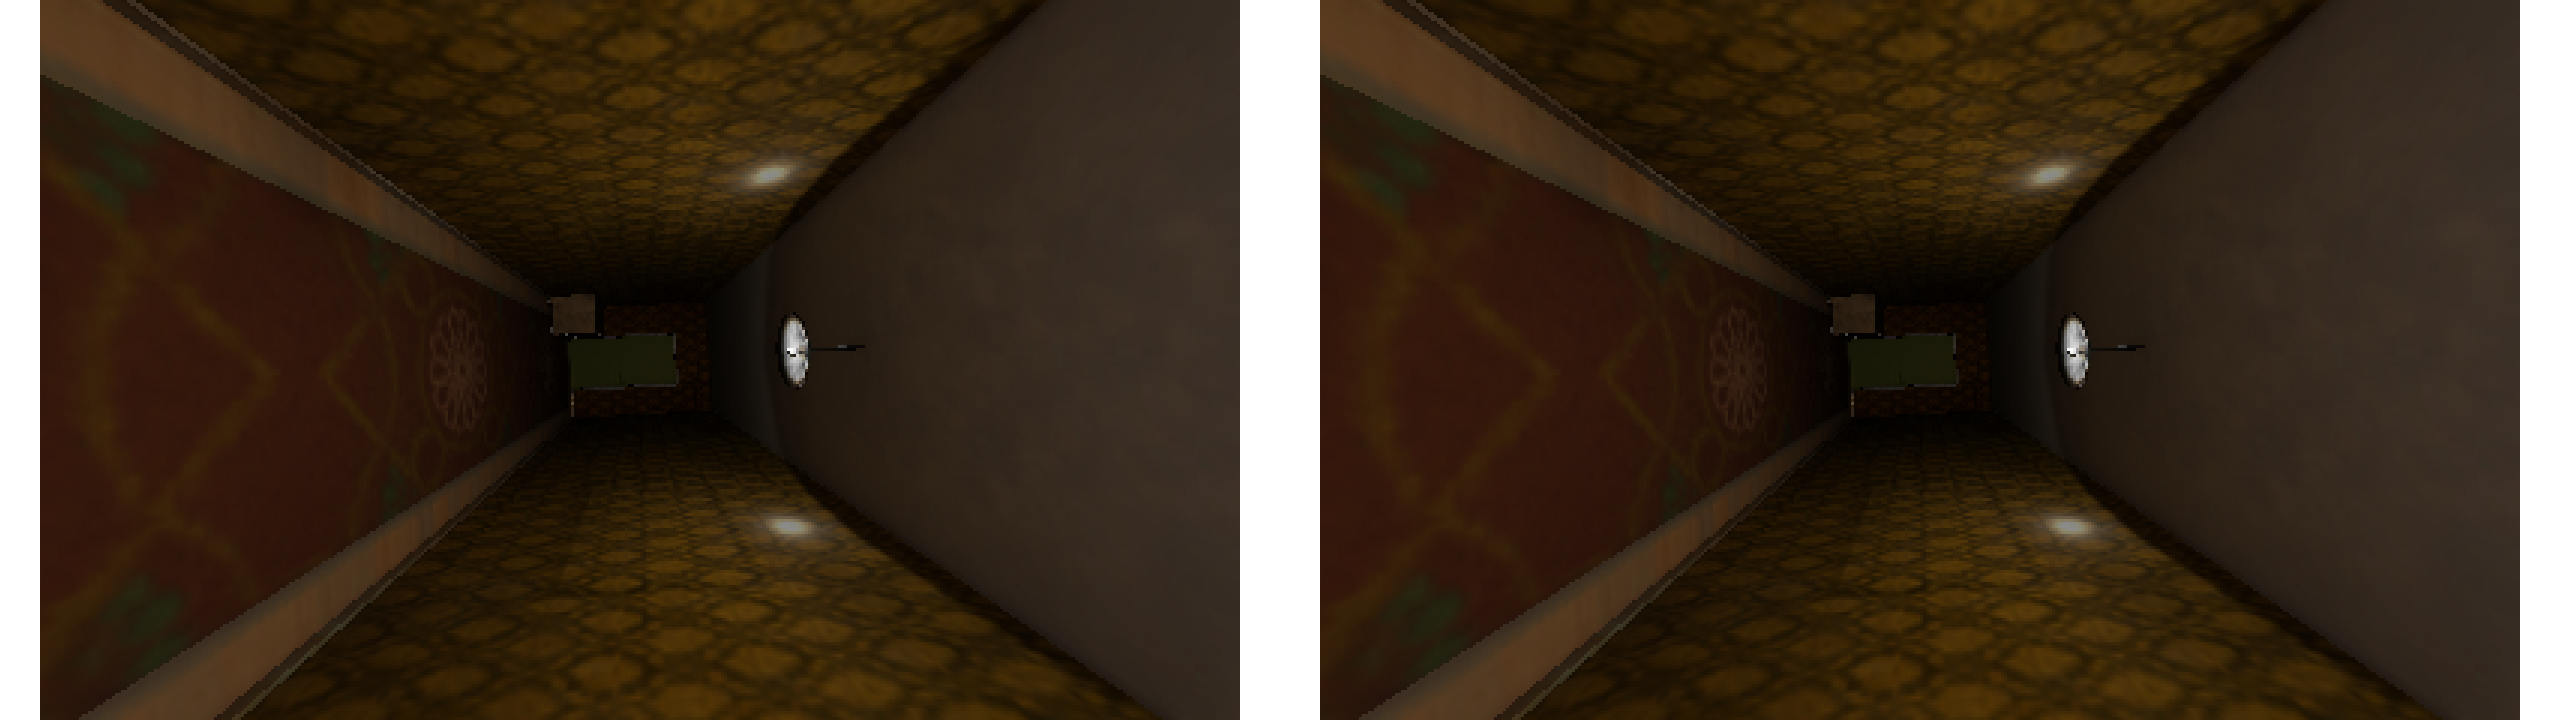

In [124]:
# ffmpeg -framerate 30 -i "fb_left_%08d.png" -i /home/lorenzdiener/dkp/nordlicht22/temp.wav -crf 15 -r 30 -c:v libx264 -pix_fmt yuv420p output.mp4 -x264opts "frame-packing=2:frame-packing-interpret=1:frame-packing-quincunx=0:frame-packing-grid=0,0,0,0"
img

'00003910.raw'